In [1]:
from qiskit import *

In [3]:
circuit=QuantumCircuit(3,3)
circuit.h(0)
circuit.cx(0,1) 
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])

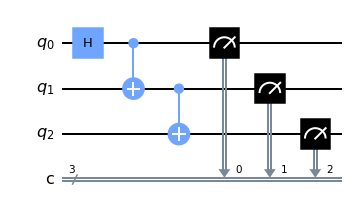

In [4]:
%matplotlib inline
circuit.draw(output='mpl')

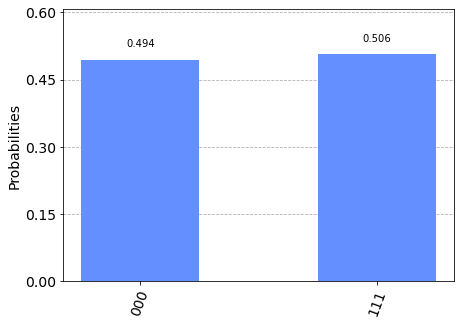

In [5]:
simulator=Aer.get_backend('qasm_simulator')
sim_result=execute(circuit,backend=simulator,shots=1024).result()
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts(circuit))

In [7]:
IBMQ.load_account()
provider=IBMQ.get_provider(hub='ibm-q')
device=provider.get_backend('ibmqx2')
job=execute(circuit,backend=device,shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

ibmqfactory.load_account:WARNING:2021-07-21 17:10:46,047: Credentials are already in use. The existing account in the session will be replaced.


60f838fb3852d1b3dd07859b
Job Status: job has successfully run


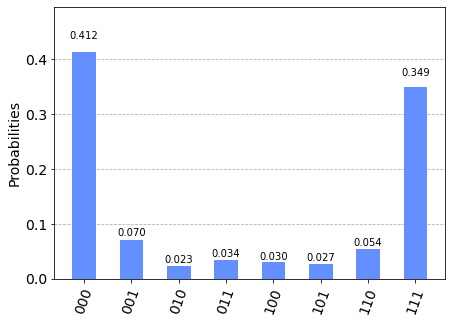

In [8]:
device_result=job.result()
plot_histogram(device_result.get_counts(circuit))

In [9]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

In [10]:
cal_circuit,state_labels = complete_meas_cal(qr=circuit.qregs[0],circlabel='measerrormitigationca1')


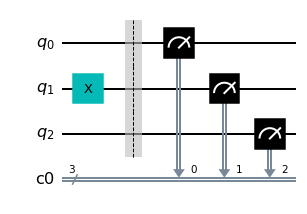

In [11]:
cal_circuit[2].draw(output='mpl')

In [12]:
len(cal_circuit)

8

In [13]:
cal_job = execute(cal_circuit,backend=device,shots=1024,optimization_level = 0)

In [14]:

print(cal_job.job_id())
job_monitor(cal_job)
cal_results=cal_job.result()

60f83a5d0e8b3f52faf2e4fe
Job Status: job has successfully run


meas_fitter=CompleteFitter(cal_result,state_labels

In [17]:
meas_fitter=CompleteMeasFitter(cal_results,state_labels)

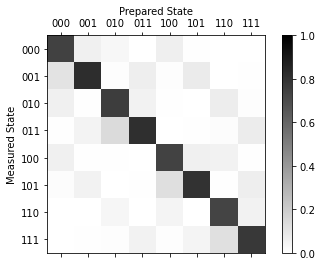

In [18]:
meas_fitter.plot_calibration()

In [19]:
meas_filter=meas_fitter.filter

In [20]:
mitigated_results=meas_filter.apply(device_result)

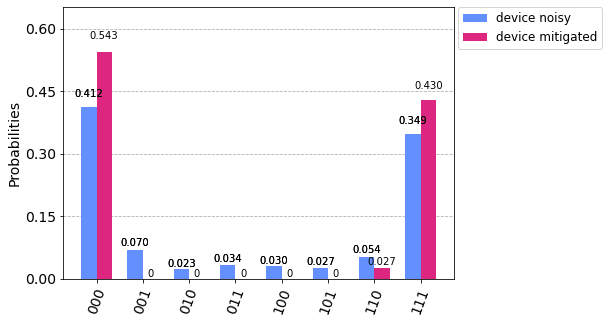

In [23]:
device_counts=device_result.get_counts(circuit)
mitigated_counts=mitigated_results.get_counts(circuit)
plot_histogram([device_counts,mitigated_counts],legend=['device noisy', 'device mitigated'])